In [ ]:
from IPython.core.display import HTML
HTML(r"""
<style>
    * {
        #color: red;
        #font-family: ‘Cascadia Code PL’;#,‘Courier New’, Courier, monospace; 
        font-family: ‘JetBrainsMono Nerd Font Regular‘, ‘Courier New’, Courier, monospace; 
        font-size: 13px !important;
        line-height: 1.1 !important;
    }
    .output-plaintext, .output-stream, .output, .markup {
        font-family: ‘JetBrainsMono Nerd Font Regular‘, ‘Courier New’, Courier, monospace; # Any monospaced font should work
        line-height: 1.3 !important;
        font-size: 13px !important;
    }
</style>
""")

# 🌌 Unsupervised Learning
_“Where there is pattern, there is meaning.”_

**Unsupervised Learning** : model dilatih untuk menemukan **pola-pola**  dari dataset tanpa label.

Biasa disebut juga dengan istilah **Clustering** (model dapat membagi dataset menjadi beberapa kluster).


## Supervised vs Unsupervised: Sebuah Kasus

misal kita punya dataset seperti ini, yang terbagi menjadi 2 label: kuning dan biru
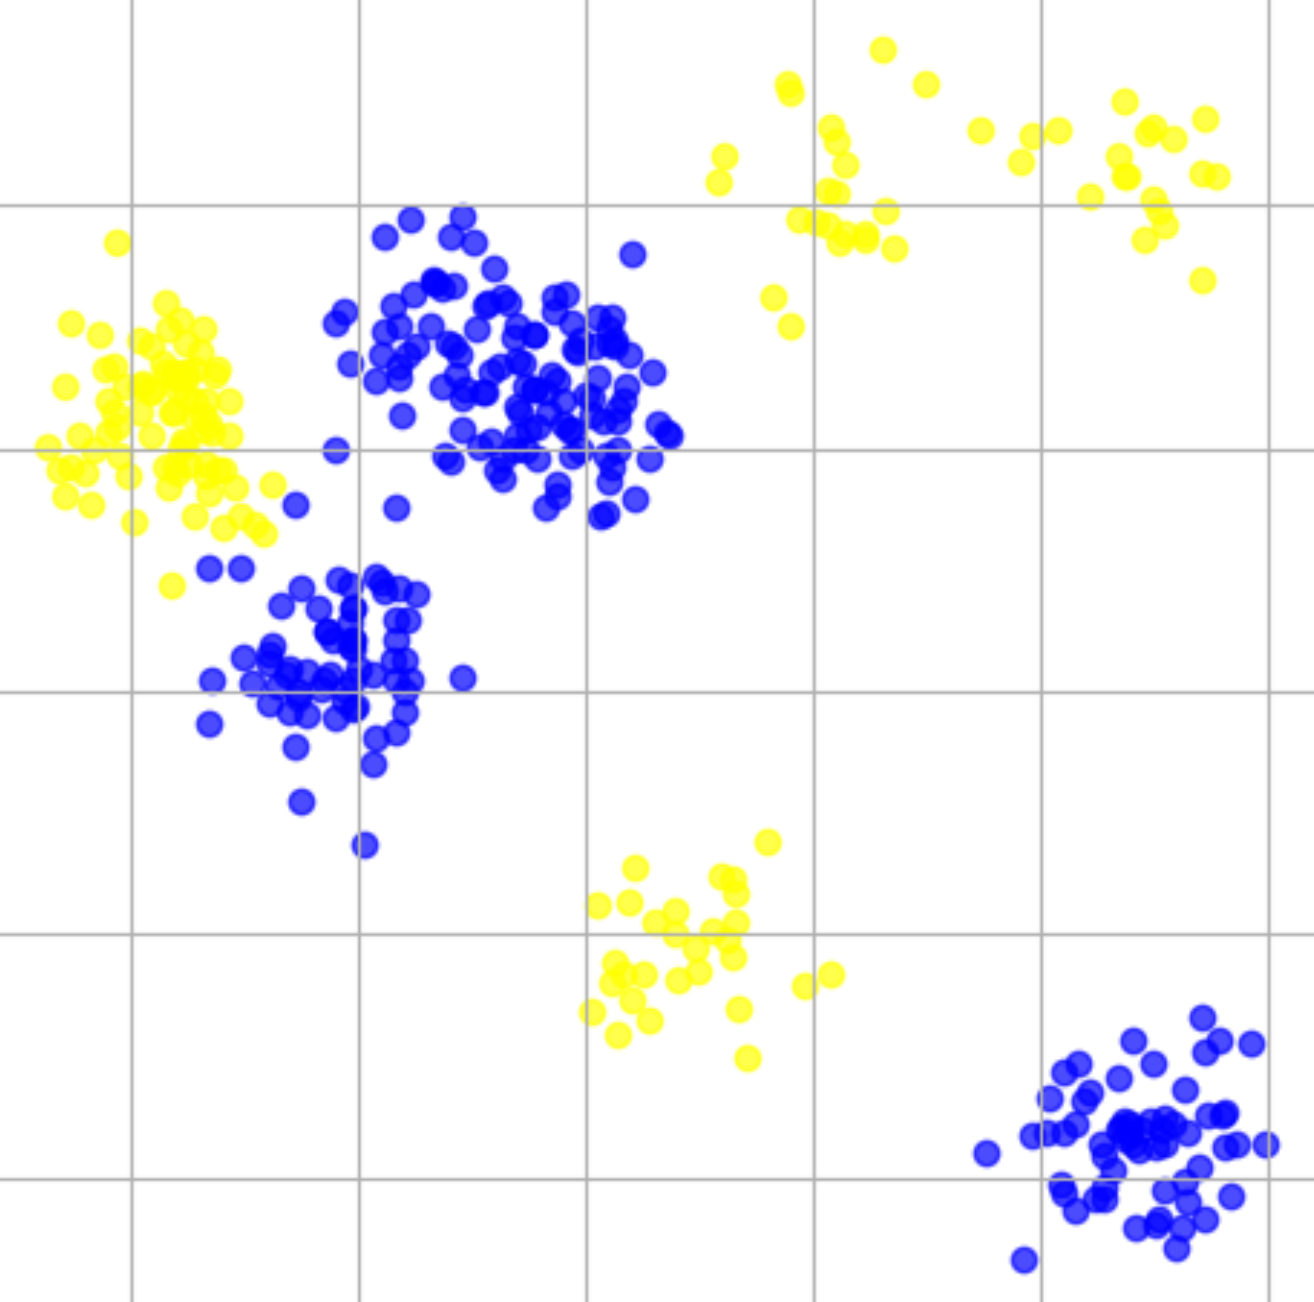

<br />

kalau kita pake `supervised learning`, model yang kita buat akan mencoba membuat sebuah fungsi yang bisa membedakan antara kedua label
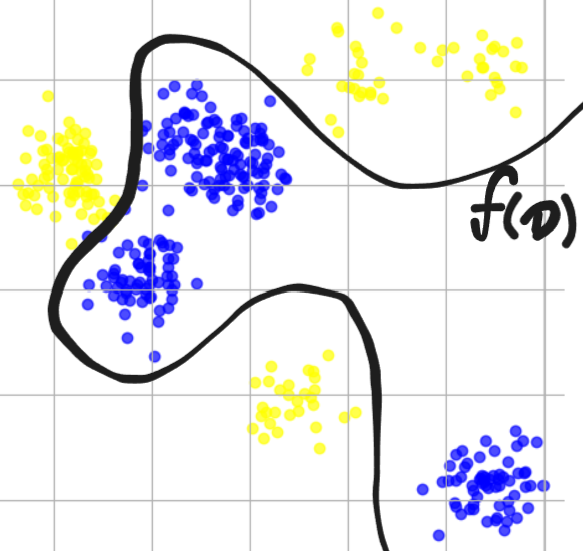

<br />

kalau kita mau latih model pake `unsupervised learning`, kita nggak perlu label di datasetnya sama sekali
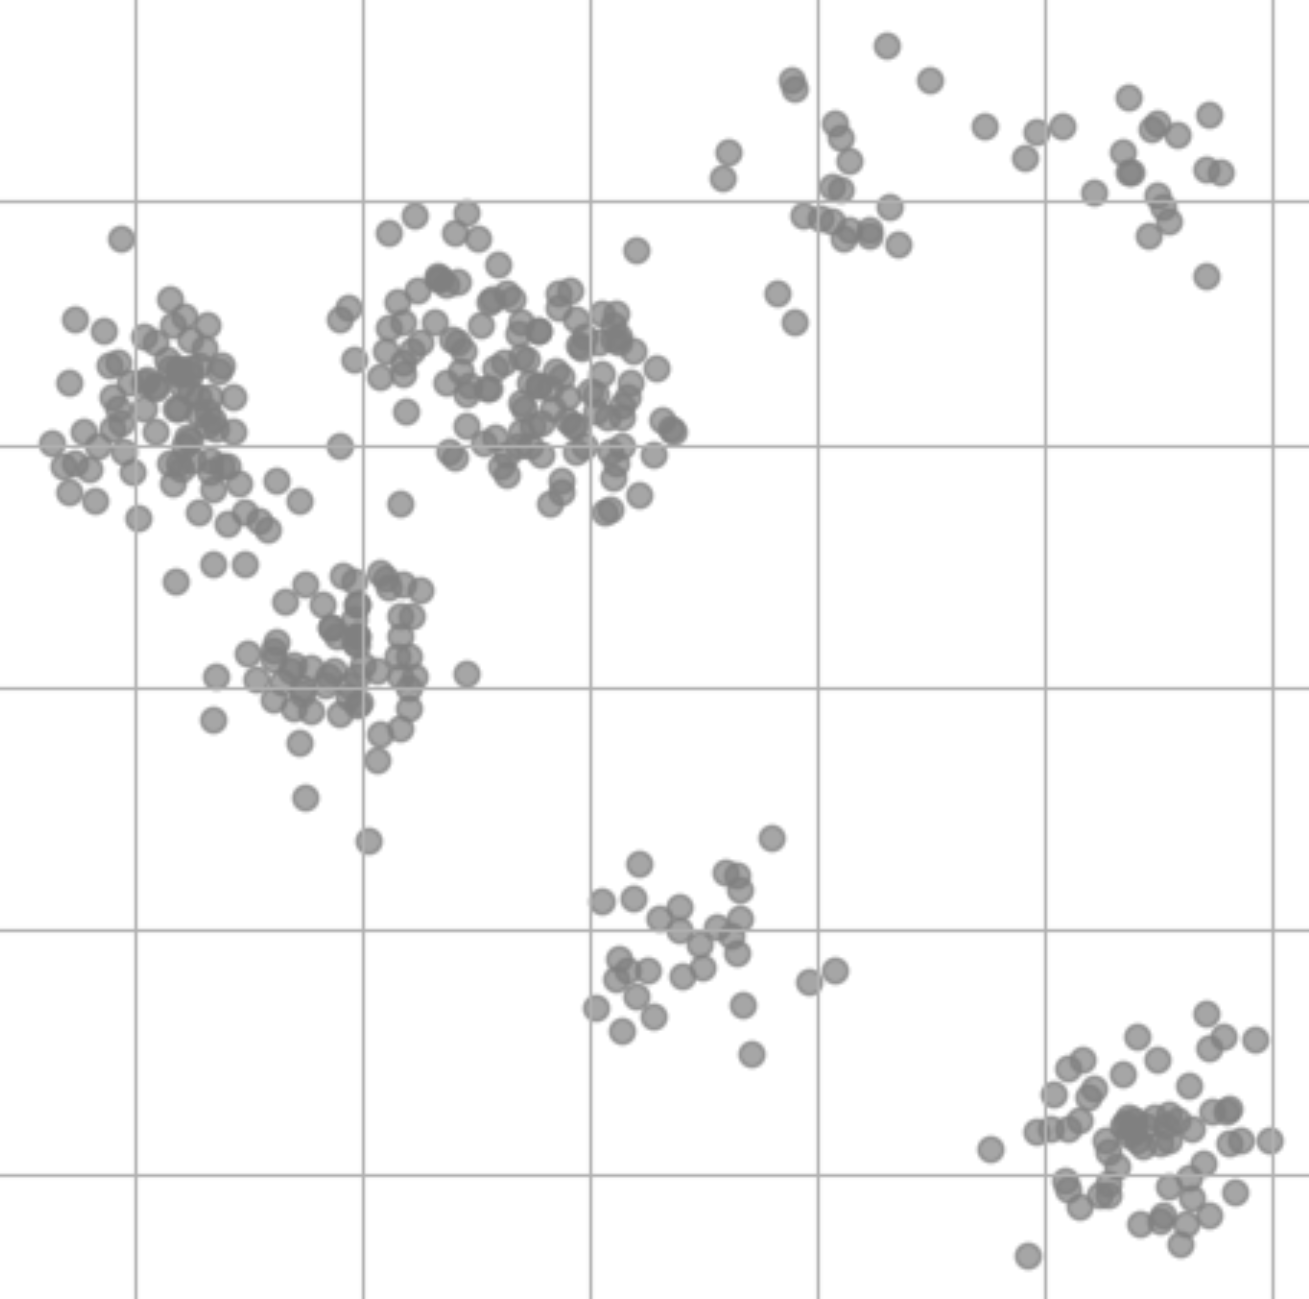

<br />

dan modelnya disuruh nebak sendiri ada pola apa di datasetnya. misal dia dikasih tahu sebelumnya klo di dataset ini ada 7 jenis objek, mungkin saja dia akan bagi dataset itu jadi begini:
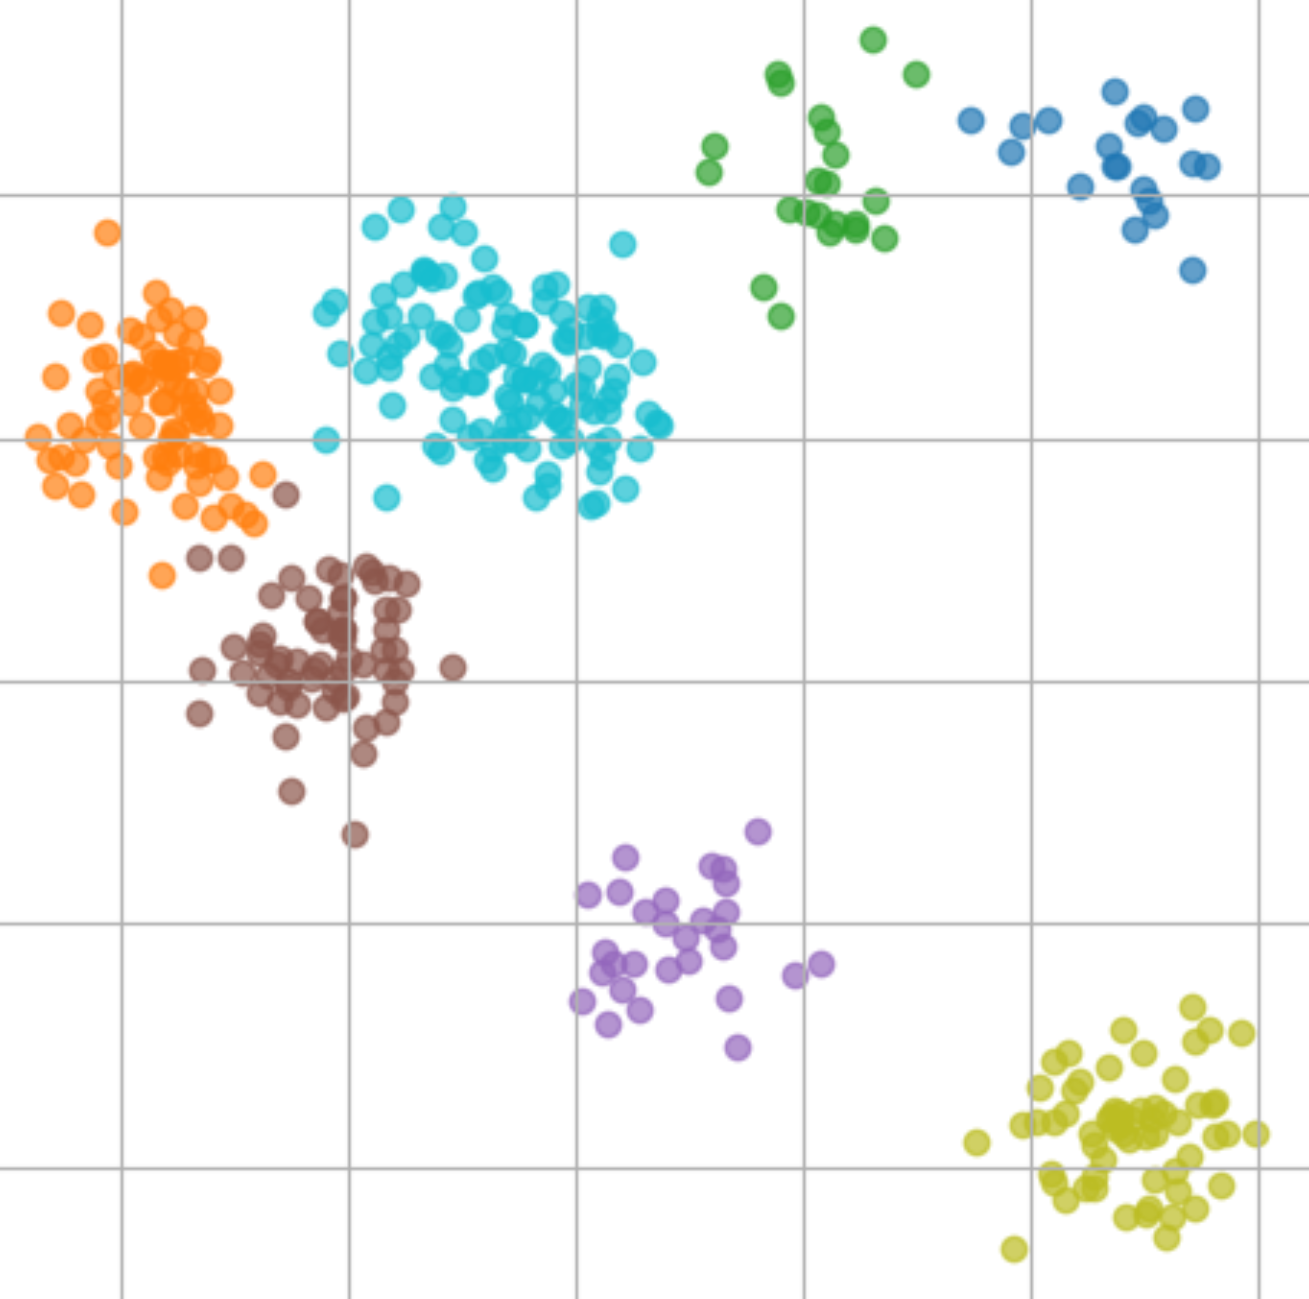

## 🌟 Apa Itu Clustering?

> Clustering adalah proses pengelompokan data ke dalam kelompok-kelompok tertentu🎯

### Optimalnya, sebuah dataset harus bisa dibagi ke beberapa kluster yang:
1. Total jarak `intra-kluster`-nya (jarak antara titik ke titik di kluster yang sama) seminimal mungkin.
2. Total jarak `antar-kluster`-nya (jarak antara satu kluster ke yang lain) semaksimal mungkin.

### Kenapa harus balanced? Karena:
1. Kalau jarak `intra-kluster`-nya masih gede, bisa aja ada satu kluster yang sebenarnya bisa dibagi jadi 2 atau lebih
2. Kalau jarak `antar-kluster`-nya kekecilan, berarti bisa aja ada 2 atau lebih kluster yang sebenernya lebih bagus jadi 1 aja

### Keyword: `Silhouette Score`
`Silhouette Score` adalah satuan yang merepresentasikan seberapa optimal pembagian kluster terhadap sebuah dataset.

## Sek, terus cara hitung jarak antar-titik atau antar-klusternya gimana? 🤔

ada 3 cara yang biasa digunakan untuk menentukan jarak:
1. Euclidean Distance
2. Manhattan/City Block Distance
3. Minkowski Distance

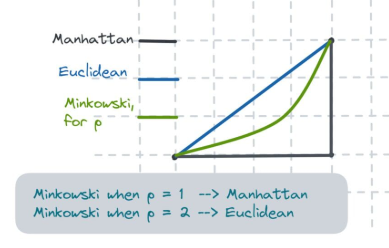

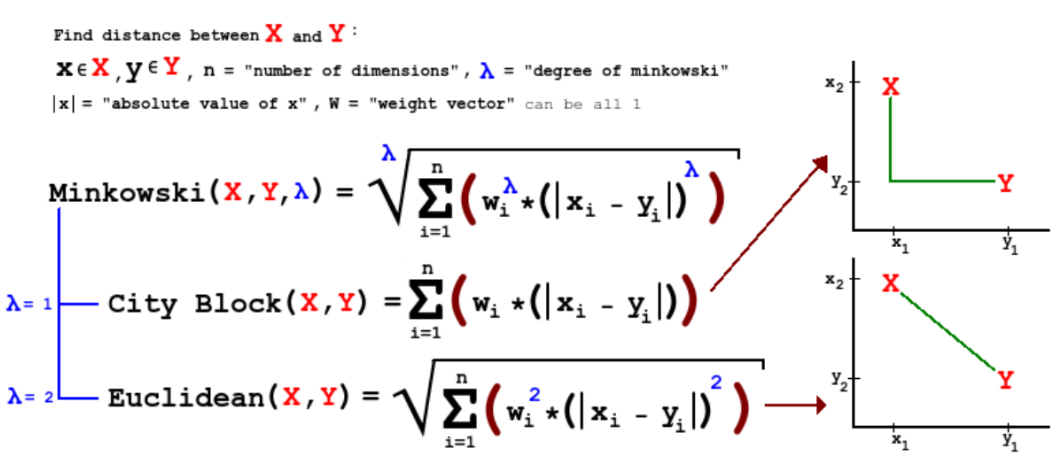

## Siap-siapin dataset dulu

Di modul ini, kita akan pake dataset `pulangpergi_kerja.csv`, yang terdiri dari 3 `fitur`:
- `harga_rupiah`: harga yang dikeluarkan untuk sekali perjalanan pulang/pergi kerja
- `jarak_km`: jarak tempuh perjalanan
- `waktu_menit`: berapa lama sekali jalan pulang/pergi kerja dalam menit

In [11]:
import pandas as pd

df = pd.read_csv('./data/pulangpergi_kerja.csv')
df.head()

,harga_rupiah,jarak_km,waktu_tempuh_menit
0,12000,14.90,39
1,26500,14.95,40
2,17500,9.21,39
3,6000,18.78,39
4,12000,15.12,39


> Kita lakukan normalisasi menggunakan StandarScaler jadi distribusi nilai-nya lebih enak untuk diproses (dan divisualisasikan)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

,harga_rupiah,jarak_km,waktu_tempuh_menit
0,-0.784562,1.256646,1.129153
1,-0.299661,1.265382,1.334527
2,-0.600634,0.262420,1.129153
3,-0.985210,1.934606,1.129153
4,-0.784562,1.295087,1.129153


> Sekedar jadi checkpoint dulu nih, kita bisa visualisasiin datasetnya pake `plotly`

In [146]:
import plotly.express as px

fig = px.scatter_3d(
  df,
  x="harga_rupiah",
  y="jarak_km",
  z="waktu_tempuh_menit",
)
fig.show()

In [147]:
import plotly.express as px

fig = px.scatter_3d(
  df_normalized,
  x="harga_rupiah",
  y="jarak_km",
  z="waktu_tempuh_menit",
)
fig.show()

## Cara 1: K-Means Clustering

Contoh yang tadi kita lihat di atas itu adalah contoh implementasi `K-Means Clustering`, yang ini tadi:

> *dan modelnya disuruh nebak sendiri ada pola apa di datasetnya. misal dia dikasih tahu sebelumnya klo di dataset ini ada 7 jenis objek, mungkin saja dia akan bagi dataset itu jadi begini:* ![clusters_clustered.png](./docs/clusters_clustered.png)

### 📊 Membagi Dataset Menjadi K Jumlah Kluster
> disini kita menggunakan huruf `k` untuk menyimbolkan jumlah kluster, beda kyk biasanya jumlah benda/entitas yang pake `n` atau jumlah iterasi yang biasanya pake `i`

Caranya?:
1. Tentukan jumlah kluster `k`
2. Taruh `k` jumlah titik yang posisinya tersebar di dataset (random), kita kasih nama titik-titik ini `centroid`
3. Untuk setiap data di dataset, tentuin dia paling deket ke `centroid` yg mana, jadi setiap data itu jadi `anaknya` salah satu `centroid`
4. Terus, ganti posisi masing-masing `centroid` menjadi posisi rata-rata dari setiap `anaknya`
5. Lakukan lagi tahap 3. Harusnya sekarang karena posisi `centroid` nya berubah, persebaran `anak`-nya juga berubah. Misal ternyata persebaran `anak`-nya nggak berubah, berarti posisi `centroid`-nya udah nggak pindah-pindah lagi, alias setiap centroid itu posisinya udah pas di tengah masing-masing cluster.
6. Kalau persebaran `anak` beneran nggak berubah2 lagi, berarti persebaran dataset menjadi `k` kluster yang optimal sudah ditemukan.

### Ngoding

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
scores = []


for k in range(2, 16):
  # model = KMeans(n_clusters=k) # (klo mau simpel kyi gini juga bisa)
  model = KMeans(n_clusters=k, init='k-means++', n_init=32, random_state=7418)
  model.fit(df_normalized)
  wcss.append(model.inertia_)
  
  labels = model.labels_
  silhouette_avg = silhouette_score(df_normalized, labels)
  scores.append(silhouette_avg)

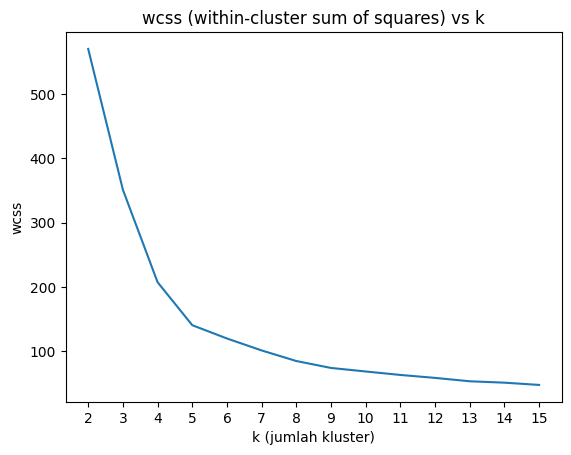

In [143]:
plt.plot(wcss)
plt.title('wcss (within-cluster sum of squares) vs k')
plt.xticks(range(len(wcss)), range(2, len(wcss)+2))
plt.xlabel('k (jumlah kluster)')
plt.ylabel('wcss')
plt.show()

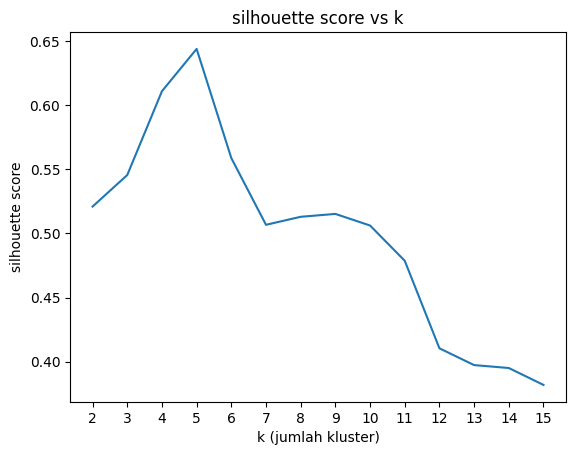

In [144]:
plt.plot(scores)
plt.title('silhouette score vs k')
plt.xticks(range(len(wcss)), range(2, len(wcss)+2))
plt.xlabel('k (jumlah kluster)')
plt.ylabel('silhouette score')
plt.show()

> Dari hasil `wcss` dan `silhouette score`, kita dapet info bahwa dataset ini paling bagus dibagi jadi `5` cluster.

In [145]:
model = KMeans(n_clusters=5, init='k-means++', n_init=32, random_state=7418)
df_normalized['cluster'] = model.fit_predict(df_normalized)

fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='cluster'
)
fig.update_traces(marker=dict(size=5)) #opsional, buat gonta ganti ukuran titik2nya doang
fig.show()

## Cara 2: (Agglomerative) Hierarchical Clustering

Metode ini nggak pake `centroid` sebagai referensi untuk perhitungan kluster. Alih2, 2 di dataset yang berdekatan langsung dikelompokin berdasarkan jaraknya. terus misal klusternya masih kebanyakan, kluster2 yang berdekatan akan digabung jadi satu kluster yang lebih gede, ulangi terus sampe ketemu pembagian yang optimal

### Cara2 gabungin kluster
1. `single`: 2 kluster yang paling bersentuhan yang digabung
2. `complete`: 2 kluster yang ujung-ke-ujungnya paling deket/paling rangkulan digabung
3. `average`: 2 kluster yang titik tengahnya paling deketan yang digabung
4. `ward`: kluster2 yang digabung dibikin se-bulat mungkin biar compact

In [148]:
from sklearn.cluster import AgglomerativeClustering

linkage = ['single', 'complete', 'average', 'ward']
scores = [[] for _ in range(len(linkage))]

for i in range (len(linkage)):
  this_scores = []
  for k in range(2, 16):
    model = AgglomerativeClustering(n_clusters = k, linkage = linkage[i])
    model.fit(df_normalized)
    
    labels = model.labels_
    silhouette_avg = silhouette_score(df_normalized, labels)
    this_scores.append(silhouette_avg)
  scores[i] = this_scores

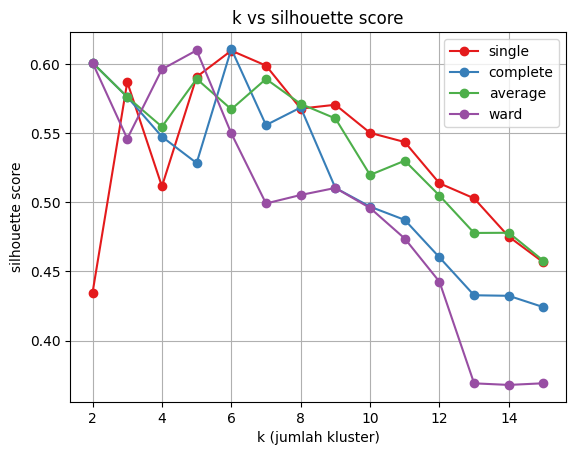

In [151]:
import seaborn as sns
colors = sns.color_palette('Set1', len(linkage))

for i in range(len(linkage)):
  plt.plot(range(2, 16), scores[i], marker = 'o', color = colors[i], label = linkage[i])
  
plt.xlabel('k (jumlah kluster)')
plt.ylabel('silhouette score')
plt.title('k vs silhouette score')
plt.legend()
plt.grid(True)
plt.show()

#### Single Linkage

In [153]:
model = AgglomerativeClustering(n_clusters = 6, linkage='single')
labels = model.fit_predict(df_normalized)

df_normalized['agg_cluster'] = labels
fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='agg_cluster'
)
fig.update_traces(marker=dict(size=5))
fig.show()

#### Complete Linkage

In [154]:
model = AgglomerativeClustering(n_clusters = 6, linkage='complete')
labels = model.fit_predict(df_normalized)

df_normalized['agg_cluster'] = labels
fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='agg_cluster'
)
fig.update_traces(marker=dict(size=5))
fig.show()

#### Average Linkage

In [155]:
model = AgglomerativeClustering(n_clusters = 7, linkage='average')
labels = model.fit_predict(df_normalized)

df_normalized['agg_cluster'] = labels
fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='agg_cluster'
)
fig.update_traces(marker=dict(size=5))
fig.show()

#### Ward Linkage

In [156]:
model = AgglomerativeClustering(n_clusters = 5, linkage='ward')
labels = model.fit_predict(df_normalized)

df_normalized['agg_cluster'] = labels
fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='agg_cluster'
)
fig.update_traces(marker=dict(size=5))
fig.show()

## Cara 3: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN menggunakan pengelompokan iteratif berdasarkan density/kepadatan titik antar titik.

In [190]:
import numpy as np
from sklearn.cluster import DBSCAN

scores = []

for e in np.arange(0.1, 0.9, 0.05):
  model = DBSCAN(eps = e, min_samples = 4)
  model.fit(df_normalized)
  
  labels = model.labels_
  mask = labels != -1
  if len(set(labels[mask])) > 1:
      silhouette_avg = silhouette_score(df_normalized[mask], labels[mask])
      scores.append(silhouette_avg)

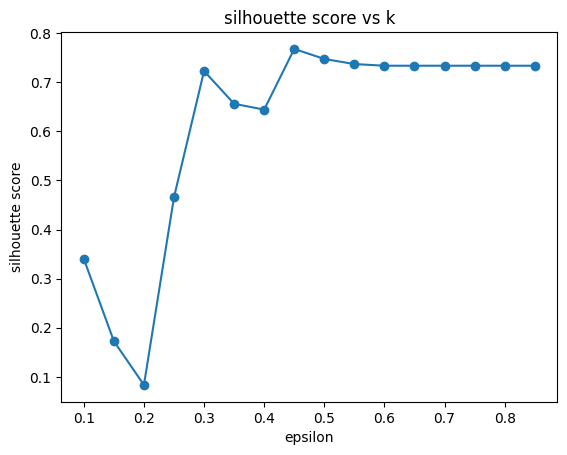

In [191]:
plt.plot(np.arange(0.1, 0.9, 0.05), scores, marker = 'o')
plt.title('silhouette score vs k')
plt.xlabel('epsilon')
plt.ylabel('silhouette score')
plt.show()

In [192]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.45, min_samples=5)
df_normalized['dbscan'] = model.fit_predict(df_normalized[['harga_rupiah', 'jarak_km', 'waktu_tempuh_menit']])

fig = px.scatter_3d(
  df_normalized,
  x='harga_rupiah',
  y='jarak_km',
  z='waktu_tempuh_menit',
  color='dbscan'
)
fig.update_traces(marker=dict(size=5))
fig.show()